In [1]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
class KNNClassifier:
    def __init__(self, k, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = []
            for i, x_train in enumerate(self.X_train):
                if self.distance_metric == 'euclidean':
                    dist = distance.euclidean(x, x_train)
                elif self.distance_metric == 'manhattan':
                    dist = distance.cityblock(x, x_train)
                distances.append((dist, self.y_train[i]))

            distances.sort(key=lambda x: x[0])
            k_nearest = distances[:self.k]
            k_nearest_labels = [label for (_, label) in k_nearest]
            y_pred.append(max(set(k_nearest_labels), key=k_nearest_labels.count))

        return y_pred

In [3]:
from sklearn.datasets import load_iris
iris  = load_iris()
iris
X, y = iris.data, iris.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Euclidean Distance

In [5]:
knn_euclidean = KNNClassifier(k=5, distance_metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)

Manhattan Distance

In [6]:
knn_manhattan = KNNClassifier(k=5, distance_metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)

accuracy scores

In [7]:
from sklearn.metrics import accuracy_score
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
print("Euclidean Accuracy", round(accuracy_euclidean,4))
print("Manhattan Accuracy", round(accuracy_manhattan,4))

Euclidean Accuracy 1.0
Manhattan Accuracy 1.0


Using Scikit library

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_sklearn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_sklearn.fit(X_train, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("scikit-learn Accuracy", round(accuracy_sklearn,4))

scikit-learn Accuracy 1.0


In [9]:
s=pd.DataFrame()
s['y_pred_euclidean'] = y_pred_euclidean
s['y_pred_manhattan'] = y_pred_manhattan
s['y_pred_sk'] = y_pred_sklearn

In [10]:
s

,y_pred_euclidean,y_pred_manhattan,y_pred_sk
0,1,1,1
1,0,0,0
2,2,2,2
3,1,1,1
4,1,1,1
5,0,0,0
6,1,1,1
7,2,2,2
8,1,1,1
9,1,1,1


In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
iris_df = pd.read_csv('Iris.csv')

In [13]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
auxiliary_data = iris_df[['SepalLengthCm', 'SepalWidthCm']]
X = auxiliary_data['SepalLengthCm'].values
y = auxiliary_data['SepalWidthCm'].values

In [15]:
X = iris_df[['SepalLengthCm']].values
y = iris_df['SepalWidthCm'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

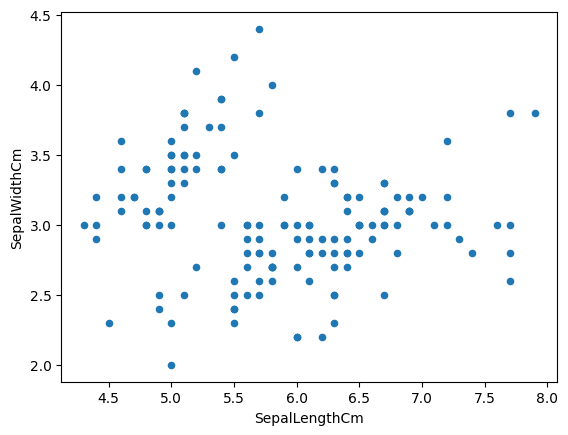

In [16]:
iris_df.plot(kind='scatter',x="SepalLengthCm", y="SepalWidthCm")

In [17]:
class KNNRegressor:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X_test):
        predictions = []
        
        for x in X_test:
            distances = np.sqrt(np.sum((self.X - x) ** 2, axis=1))  
            nearest_indices = np.argsort(distances)[:self.n_neighbors] 
            nearest_labels = self.y[nearest_indices]  
            prediction = np.mean(nearest_labels)              
            predictions.append(prediction)
        return np.array(predictions)


In [38]:
knn_custom = KNNRegressor(n_neighbors=3)
knn_custom.fit(X_train, y_train)
y_pred_custom = knn_custom.predict(X_test)
mse_custom = mean_squared_error(y_test, y_pred_custom)
rmse_custom = np.sqrt(mse_custom)
print("KNN Regressor Mean Square Error:", round(mse_custom*100,4),"%")
print("KNN Regressor Root mean square error",round(rmse_custom*100,4),"%")

KNN Regressor Mean Square Error: 19.8704 %
KNN Regressor Root mean square error 44.5762 %


In [37]:
knn_custom = KNNRegressor(n_neighbors=5)
knn_custom.fit(X_train, y_train)
y_pred_custom = knn_custom.predict(X_test)
mse_custom = mean_squared_error(y_test, y_pred_custom)
rmse_custom = np.sqrt(mse_custom)
print("KNN Regressor Mean Square Error:", round(mse_custom*100,4),"%")
print("KNN Regressor Root mean square error",round(rmse_custom*100,4),"%")

KNN Regressor Mean Square Error: 15.9493 %
KNN Regressor Root mean square error 39.9366 %


Using sklearn Library

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sklearn_knn_regressor = KNeighborsRegressor(n_neighbors=5)
sklearn_knn_regressor.fit(X_train, y_train)
sklearn_y_pred = sklearn_knn_regressor.predict(X_test)
sklearn_mse = mean_squared_error(y_test, sklearn_y_pred)
sklearn_rmse = np.sqrt(sklearn_mse)

In [31]:
print("Mean square error using Scikit Library:",round(sklearn_mse*100,4),"%")
print("Root mean square error using Scikit Library:", round(sklearn_rmse*100,4),"%")

Mean square error using Scikit Library: 15.4427 %
Root mean square error using Scikit Library: 39.2972 %
